In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
population= pd.read_csv('population_total.csv')

In [3]:
population

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


In [4]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     4185 non-null   object 
 1   year        4178 non-null   float64
 2   population  4178 non-null   float64
dtypes: float64(2), object(1)
memory usage: 98.2+ KB


In [5]:
population.dtypes

country        object
year          float64
population    float64
dtype: object

In [8]:
# first search for null values
population.isnull().sum()

country       0
year          7
population    7
dtype: int64

In [10]:
# then drop them , also adding inplace to ensure it stays
population.dropna(inplace=True)

In [11]:
# change both the year and population column to to integers
population['year']=population['year'].astype('int64')
population['population']=population['population'].astype('int64')

In [12]:
# create a pivot table with desired datas
west_population=population.pivot(index='year',columns='country',values='population')

In [13]:
# then use the variable on selected countries 
west_population=west_population[['Nigeria', 'Ghana', 'Niger','Cameroon','Senegal','Benin','Togo']]

In [14]:
west_population

country,Nigeria,Ghana,Niger,Cameroon,Senegal,Benin,Togo
year,,,,,,,
1955,41086100.0,5730594.0,2955541.0,4706995.0,2808225.0,2303587.0,1473839.0
1960,45138458.0,6635230.0,3388764.0,5176918.0,3206749.0,2431622.0,1580513.0
1965,50127921.0,7739473.0,3914117.0,5773543.0,3682876.0,2632356.0,1708630.0
1970,55982144.0,8735495.0,4510644.0,6519762.0,4257505.0,2912340.0,2115522.0
1975,63374298.0,9985946.0,5184941.0,7451054.0,4929846.0,3265165.0,2410446.0
1980,73423633.0,11056116.0,5989004.0,8621406.0,5583165.0,3717165.0,2720839.0
1985,83562785.0,12783613.0,6915997.0,10070806.0,6471327.0,4278501.0,3252994.0
1990,95212450.0,14773277.0,8026591.0,11780088.0,7526307.0,4978496.0,3774312.0
1995,107948335.0,17014057.0,9490288.0,13599988.0,8690164.0,5905558.0,4226291.0


<AxesSubplot:title={'center':'Population (1955 -2020)'}, xlabel='year', ylabel='population'>

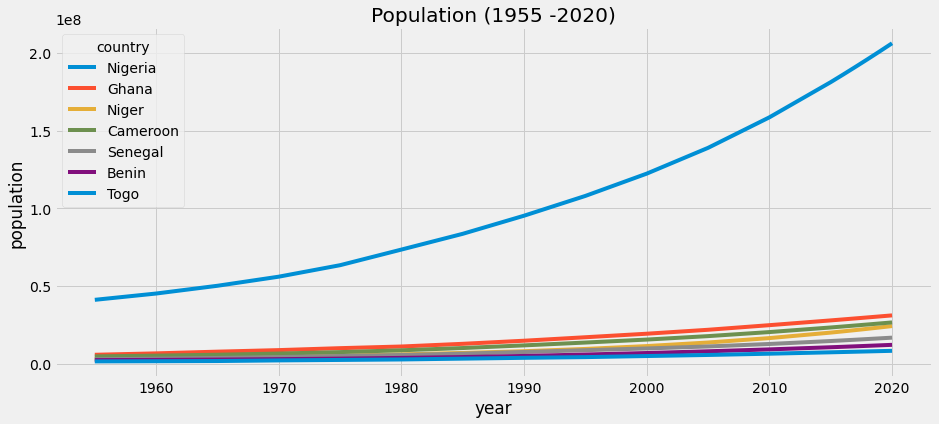

In [17]:
# plot a line plot graph
west_population.plot(kind= 'line', xlabel='year', ylabel='population', figsize=(14,6), title='Population (1955 -2020)')

In [20]:
# extract the data for only 2020
west_population_2020=west_population[west_population.index.isin([2020])]

In [21]:
west_population_2020

country,Nigeria,Ghana,Niger,Cameroon,Senegal,Benin,Togo
year,,,,,,,
2020,206139589.0,31072940.0,24206644.0,26545863.0,16743927.0,12123200.0,8278724.0


In [27]:
# transpose it , so you can properly plot it in a bar chart
west_population_2020_1=west_population_2020.T

<AxesSubplot:title={'center':'Population 2020'}, xlabel='year', ylabel='population'>

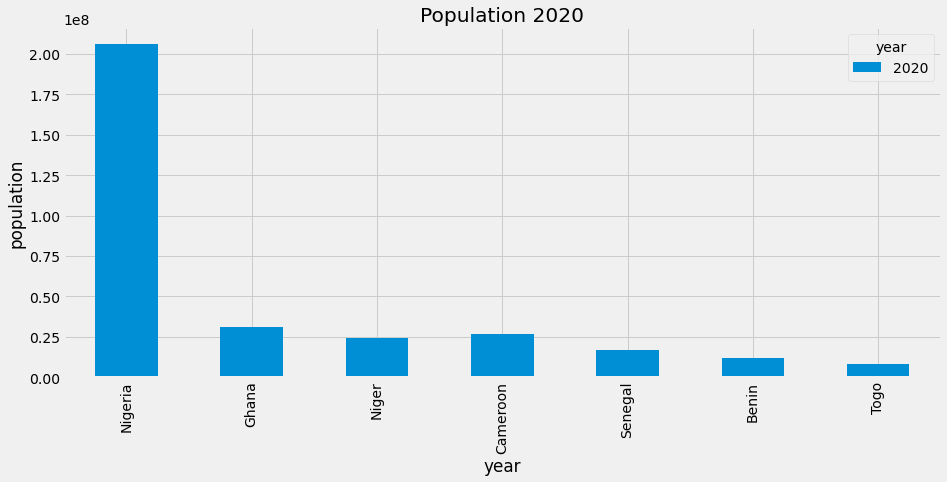

In [29]:
# plot a bar chart
west_population_2020_1.plot(kind='bar', xlabel='year',ylabel='population',figsize=(14,6),title = 'Population 2020')

In [31]:
# extract data for specific dates
west_population_grp=west_population[west_population.index.isin([2000,2005,2010,2015,2020])]

In [32]:
west_population_grp

country,Nigeria,Ghana,Niger,Cameroon,Senegal,Benin,Togo
year,,,,,,,
2000,122283850.0,19278856.0,11331557.0,15513945.0,9797734.0,6865951.0,4924402.0
2005,138865016.0,21814642.0,13624467.0,17733410.0,11090116.0,7982225.0,5611640.0
2010,158503197.0,24779619.0,16464025.0,20341241.0,12678148.0,9199259.0,6421679.0
2015,181137448.0,27849205.0,20001663.0,23298368.0,14578459.0,10575952.0,7323158.0
2020,206139589.0,31072940.0,24206644.0,26545863.0,16743927.0,12123200.0,8278724.0


<AxesSubplot:title={'center':'Population last two decades'}, xlabel='year', ylabel='population'>

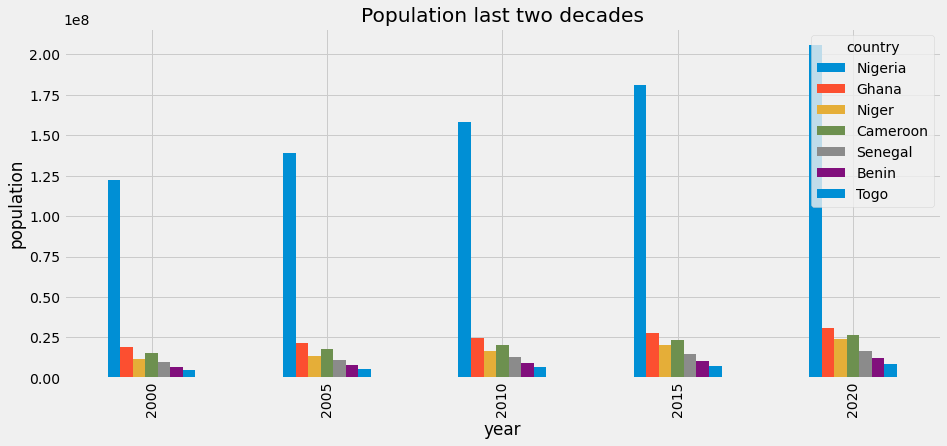

In [34]:
# plot a bar chart
west_population_grp.plot(kind='bar',xlabel='year',ylabel='population',figsize=(14,6),title = 'Population last two decades')

In [35]:

west_population_2020_1.rename(columns={2020:'2020'}, inplace = True)

<AxesSubplot:title={'center':'Population 2020(%)'}, ylabel='2020'>

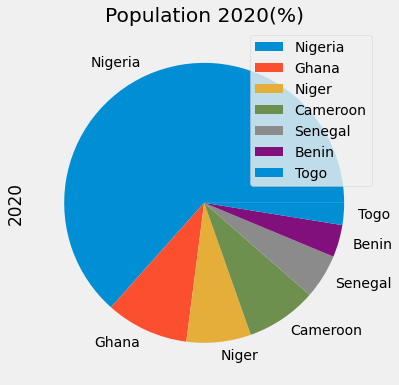

In [39]:
west_population_2020_1.plot(kind='pie',y='2020',figsize=(20,6),title='Population 2020(%)')

In [40]:
# firt extract the Nigerian data
Nigeria=population.query('country=="Nigeria"')
# then sort the values according to year
Nigeria_sorted=Nigeria.sort_values('year')
# proceed to remove the index
Nigeria_sorted.reset_index(inplace=True)
# then assign a new index
Nigeria_sorted_1=Nigeria_sorted.set_index('year')

In [55]:
# the drop the previous index column
Nigeria_sorted_2=Nigeria_sorted_1.drop(labels='index', axis=1)

<AxesSubplot:title={'center':'Population Gradient Nigeria'}, xlabel='year', ylabel='population'>

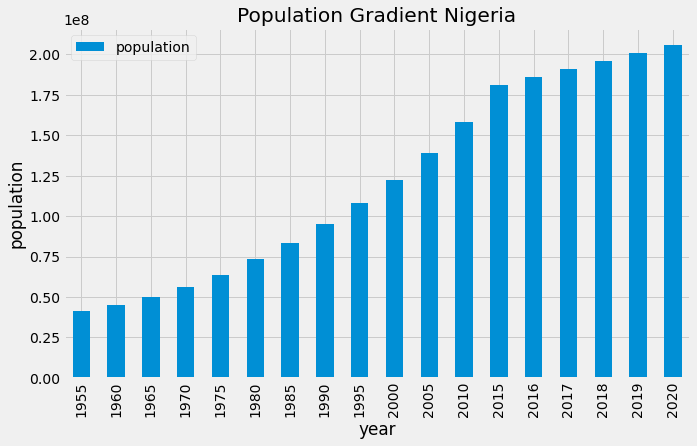

In [64]:
Nigeria_sorted_2.plot(kind='bar',xlabel='year',ylabel='population',figsize=(10,6), title='Population Gradient Nigeria')